# Clean listing file by Python

In [1]:
import os
import pandas as pd
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from numpy import arange

In [2]:
df = pd.read_csv('/Users/ngocnguyen/Dropbox/Mac/Desktop/SQL/listings.csv')

In [3]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211207182339,2021-12-09,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.90,4.65,4.75,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,20211207182339,2021-12-09,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.61
2,17402,https://www.airbnb.com/rooms/17402,20211207182339,2021-12-09,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,1,1,0,0,0.33
3,17506,https://www.airbnb.com/rooms/17506,20211207182339,2021-12-09,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,25123,https://www.airbnb.com/rooms/25123,20211207182339,2021-12-09,Clean big Room in London (Room 1),Big room with double bed/ clean sheets/ clean ...,Barnet is one of the largest boroughs in Londo...,https://a0.muscache.com/pictures/456905/a004b9...,103583,https://www.airbnb.com/users/show/103583,...,4.89,4.45,4.74,NaN,t,3,0,3,0,0.91


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66641 entries, 0 to 66640
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66641 non-null  int64  
 1   listing_url                                   66641 non-null  object 
 2   scrape_id                                     66641 non-null  int64  
 3   last_scraped                                  66641 non-null  object 
 4   name                                          66617 non-null  object 
 5   description                                   64297 non-null  object 
 6   neighborhood_overview                         39967 non-null  object 
 7   picture_url                                   66641 non-null  object 
 8   host_id                                       66641 non-null  int64  
 9   host_url                                      66641 non-null 

In [5]:
# drop irrelevant and null columns
to_drop = ['name','host_about','neighborhood_overview','neighbourhood_group_cleansed', 'license', 'calendar_updated', 'bathrooms','id', 'listing_url', 'scrape_id', 'last_scraped','host_name',
       'picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url','description', 'host_since', 'calendar_last_scraped','availability_30','availability_60','availability_90','availability_365']
df = df.drop(to_drop, axis=1)

## Missing data 

In [6]:
df.shape

(66641, 50)

In [7]:
# check missing values in dataset
missing = df.isnull().sum()>0
missing_col = df.columns[missing]
df[missing_col].isnull().sum()/df[missing_col].shape[0]*100

host_location                   0.301616
host_response_time             51.520836
host_response_rate             51.520836
host_acceptance_rate           49.508561
host_is_superhost               0.088534
host_neighbourhood             29.292778
host_listings_count             0.088534
host_total_listings_count       0.088534
host_has_profile_pic            0.088534
host_identity_verified          0.088534
neighbourhood                  40.024910
bathrooms_text                  0.366141
bedrooms                        6.027821
beds                            5.471106
minimum_minimum_nights          0.004502
maximum_minimum_nights          0.004502
minimum_maximum_nights          0.004502
maximum_maximum_nights          0.004502
minimum_nights_avg_ntm          0.004502
maximum_nights_avg_ntm          0.004502
first_review                   27.849222
last_review                    27.849222
review_scores_rating           27.849222
review_scores_accuracy         29.826983
review_scores_cl

<AxesSubplot:>

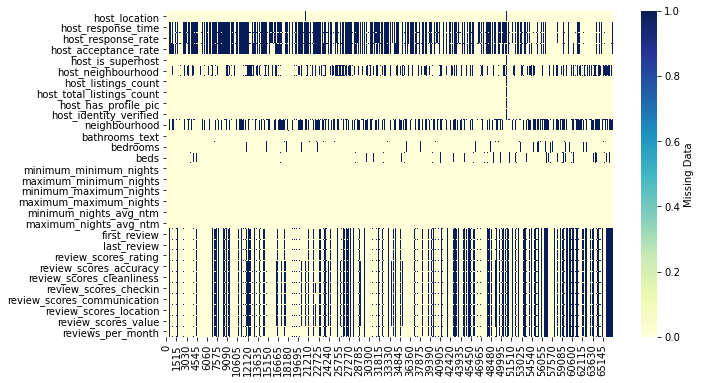

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df[missing_col].isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [9]:
# drop features having more than 20% missing values
to_drop2 = df.isnull().sum()/df.shape[0]*100>20
to_drop2_col = df.columns[to_drop2]
df = df.drop(to_drop2_col, axis=1)
df.shape

(66641, 35)

<AxesSubplot:>

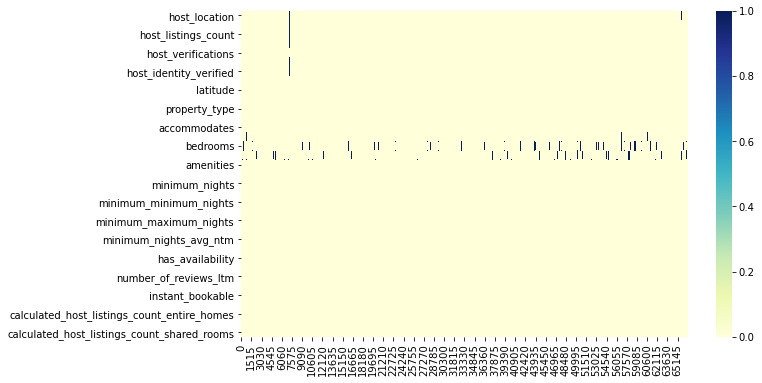

In [10]:
# recheck missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull().transpose(),
            cmap="YlGnBu")

## Filling missing data by imputing

In [11]:
# imputing data 
vars_numeric = [var for var in df.columns if df[var].dtype != 'object' and var != 'price']
vars_category = [var for var in df.columns if var not in vars_numeric and var != 'price']
missing_cols = df.columns[df.isnull().sum() > 0]

# Extract the median of the variable to be the imputing value (NUMERIC ONLY)
impute_numeric = df[missing_cols].median().to_dict()

# Extract the most popular value to be the imputating value (CATEGORY ONLY)
impute_category = {}
for c in vars_category :
    value_impute = df[c].value_counts().index.tolist()[0]
    impute_category[c] = value_impute

# Merge 2 impute dictionary together
impute_dict = {**impute_numeric, **impute_category}

# Imputing values that have missing rows and columns
for c in missing_cols:
    mask = df[c].isnull()
    df.loc[mask,c] = impute_dict[c]

<ipython-input-11-58b8aa3f72fb>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  impute_numeric = df[missing_cols].median().to_dict()


## Clean strings in variable host_verifications and amenities

In [12]:
# create function to clean host_verifications and amenities
def clean_array(string):
    """
    Remove (['""'])
    """
    string = re.sub(r'[\[\]\'\" ]','',string)
    return string

In [13]:
# clean amenities columns
df['amenities'] = df['amenities'].str.replace('", "',',').str.replace(' ','_').str.lower()
df['amenities'] = df['amenities'].apply(clean_array)

In [14]:
# find the unique elements for amenities
unique_amenities = []
for i in range(df.shape[0]):
    ame_array = df['amenities'][i].split(',')
    for element in ame_array:
        unique_amenities.append(element)
        unique_amenities = list(set(unique_amenities))    # Remove the duplicates
print(len(unique_amenities))

2561


In [15]:
# create dummy variables
for amen in unique_amenities:
    df[amen] = df['amenities'].apply(lambda x:1 if amen in x else 0)
# drop amenities vafriable
df.drop('amenities',axis=1,inplace=True)

<ipython-input-15-e467db04a5ed>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amen] = df['amenities'].apply(lambda x:1 if amen in x else 0)
<ipython-input-15-e467db04a5ed>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amen] = df['amenities'].apply(lambda x:1 if amen in x else 0)
<ipython-input-15-e467db04a5ed>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1)

In [16]:
# Clean host_verifications 
df['host_verifications'] = df['host_verifications'].apply(clean_array)

# Extracting unique verifcations
unique_verification = []

for i in range(df.shape[0]):
    veri_array = df['host_verifications'][i].split(',')
    for element in veri_array:
        unique_verification.append(element)
        unique_verification = list(set(unique_verification))      # Remove the duplicates
        
# create dummy variables
for veri in unique_verification:
    df[veri] = df['host_verifications'].apply(lambda x:1 if veri in x else 0)

# drop host verifications variables    
df.drop('host_verifications',axis=1,inplace=True)

##  Cleaning price columns

In [17]:
# Extracting all the number in price
df['price'] = df['price'].str.extract(r'(\d+)')[0]
# Changing into integer
df['price'] = df['price'].astype(int)

## Create dummy variable for host_is_superhost, host_has_profile_pic, host_identity_verified, instant_bookable variables

In [18]:
tf = ['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']
for c in tf:
    df[c] = df[c].apply(lambda x: 1 if x=='t' else 0)

## Detect outliers

/Users/ngocnguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


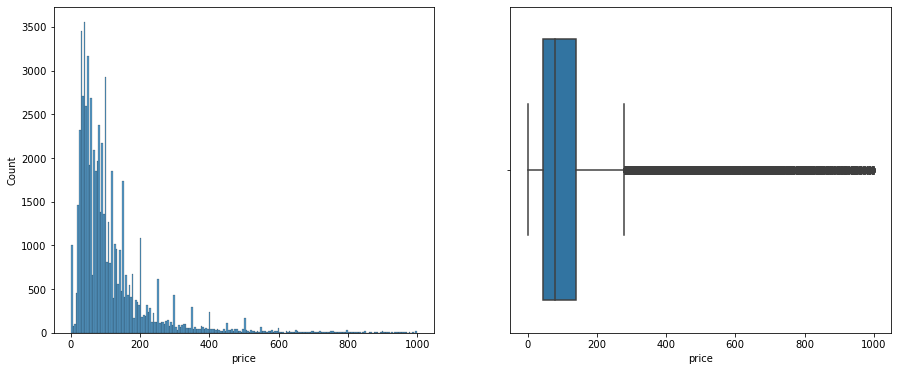

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
sns.histplot(df['price'], ax=ax1)
sns.boxplot(df['price'], ax=ax2)
plt.show()

In [20]:
df['price'].describe()

count    66641.000000
mean       114.928978
std        118.393763
min          0.000000
25%         45.000000
50%         80.000000
75%        139.000000
max        999.000000
Name: price, dtype: float64

In [21]:
df.shape

(66641, 2615)

In [22]:
 # Only selecting price in range [15,150] per night
df = df.loc[(df['price'] >39) & (df['price'] < 240),:].reset_index(drop=True)

In [23]:
df.shape

(47379, 2615)

In [24]:
df.to_csv ('/Users/ngocnguyen/Dropbox/Mac/Desktop/SQL/listing_cleaned.csv', index = None, header=True) 
